In [170]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

%matplotlib inline  

<h3>Carrega os arquivos e padroniza os sem informação</h3>

In [171]:
missing_values = ["n/a", "na", "--", " "] # mais comuns
df = pd.read_csv("/Users/filipetatarli/Documents/WA_Fn-UseC_-Telco-Customer-Churn.csv", na_values = missing_values)

In [50]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


<h3>Verifica se há valores não preenchidos</h3>

In [52]:
df.isnull().sum() # verificando se há valores não preenchidos

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [156]:
df.TotalCharges.fillna(value = df.tenure * df.MonthlyCharges, inplace = True)
df.isnull().sum() # verificando se há valores não preenchidos

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<h2> Estuda variáveis </h2>

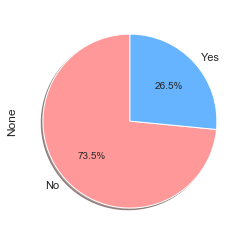

In [54]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

ax = df.groupby('Churn').size().transform(lambda x: x/x.sum())
#ax.plot.pie(legend="True")
ax.plot.pie(autopct='%1.1f%%', startangle=90,shadow=True,colors = colors)

## https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [172]:
# PADRONIZANDO COLUNAS 
df.drop(["customerID"], axis=1, inplace=True)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Partner'] = df['Partner'].str.lower().replace({"yes": 1, "no": 0})
df['Dependents'] = df['Dependents'].str.lower().replace({"yes": 1, "no": 0})
df['PhoneService'] = df['PhoneService'].str.lower().replace({"yes": 1, "no": 0, "no internet service": 0})
df['OnlineSecurity'] = df['OnlineSecurity'].str.lower().replace({"yes": 1, "no": 0, "no internet service": 0})
df['TechSupport'] = df['TechSupport'].str.lower().replace({"yes": 1, "no": 0, "no internet service": 0})
df['StreamingTV'] = df['StreamingTV'].str.lower().replace({"yes": 1, "no": 0, "no internet service": 0})
df['StreamingMovies'] = df['StreamingMovies'].str.lower().replace({"yes": 1, "no": 0, "no internet service": 0})
df['PaperlessBilling'] = df['PaperlessBilling'].str.lower().replace({"yes": 1, "no": 0, "no internet service": 0})
df['OnlineBackup'] = df['OnlineBackup'].str.lower().replace({"yes": 1, "no": 0, "no internet service": 0})
df['DeviceProtection'] = df['DeviceProtection'].str.lower().replace({"yes": 1, "no": 0, "no internet service": 0})
df['Churn'] = df['Churn'].str.lower().replace({"yes": 1, "no": 0})

In [75]:
display(df[['tenure','MonthlyCharges','TotalCharges']].describe())

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


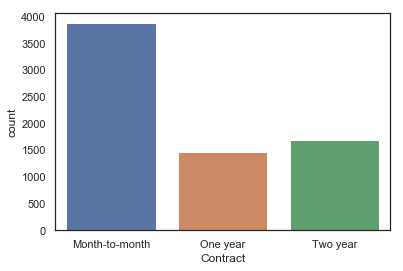

In [86]:
sns.countplot(x="Contract", data=df)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


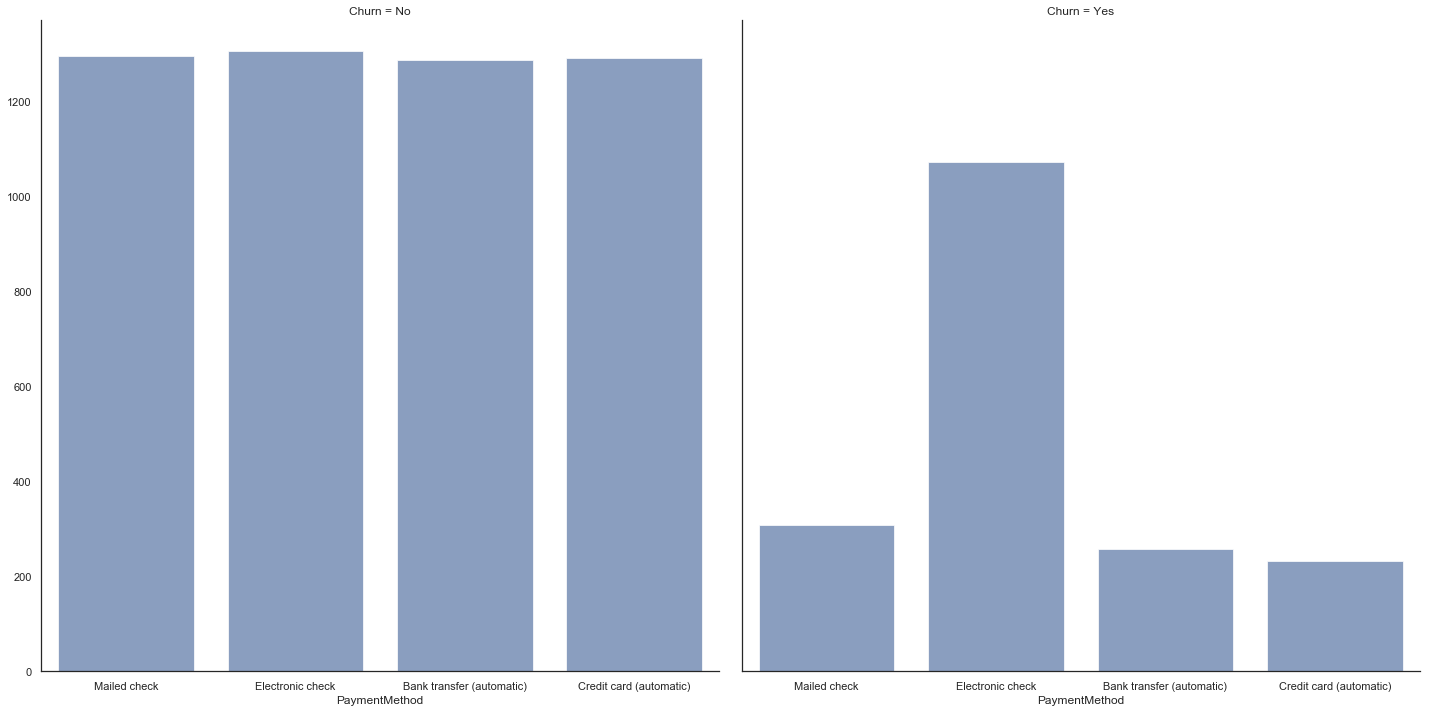

In [166]:
g = sns.FacetGrid(df, col="Churn", size=10, palette="Set1")
g.map(sns.countplot, "PaymentMethod", alpha=.7);

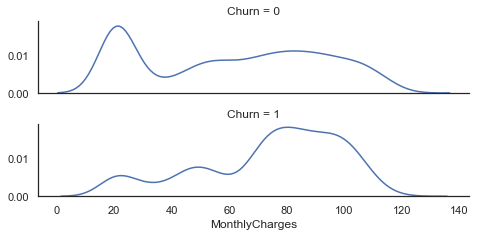

In [100]:
g = sns.FacetGrid(df, row="Churn", height=1.7, aspect=4,)
g.map(sns.distplot, "MonthlyCharges", hist=False, rug=False);

<h2> Achando Outliers </h2>

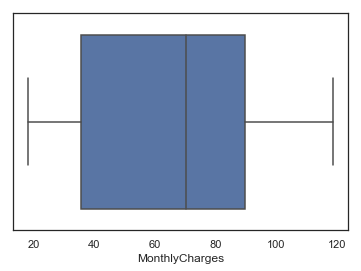

In [87]:
sns.boxplot(x=df['MonthlyCharges'])

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


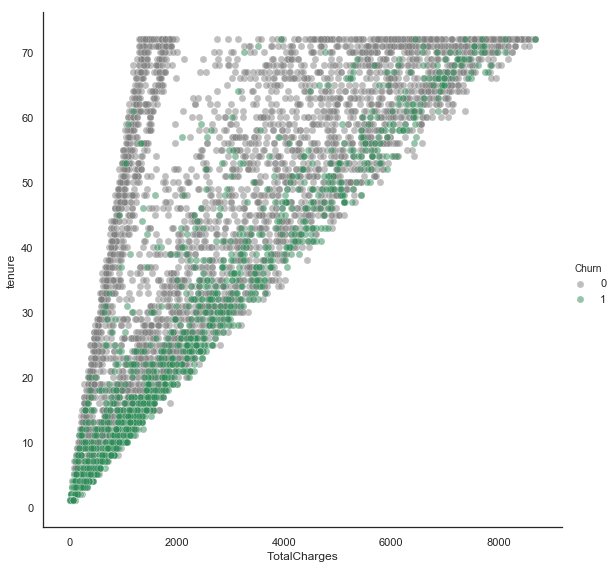

In [184]:
pal = dict([(1,'seagreen'), (0,'gray')])
g = sns.FacetGrid(df, hue="Churn", palette=pal, height=5, size=8)
g.map(plt.scatter, "TotalCharges", "tenure", s=50, alpha=.5, linewidth=.4, edgecolor="white")
g.add_legend();


# https://github.com/mwaskom/seaborn/issues/1114

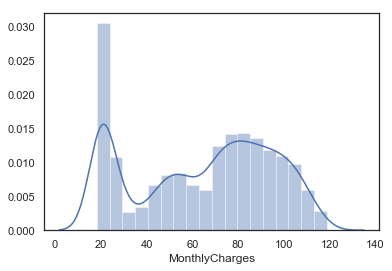

In [24]:
#sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges']]);
sns.distplot(df['MonthlyCharges']);

In [12]:
df_log_transformed = df 
df_log_transformed['MonthlyCharges'] = df['MonthlyCharges'].apply(lambda x: np.log(x + 1))

In [ ]:
# REMOVENDO OUTLOIERS


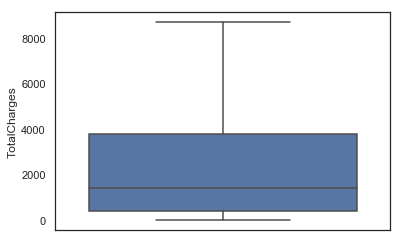

In [386]:
sns.boxplot(y=df["TotalCharges"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17d39e10>,
      dtype=object)

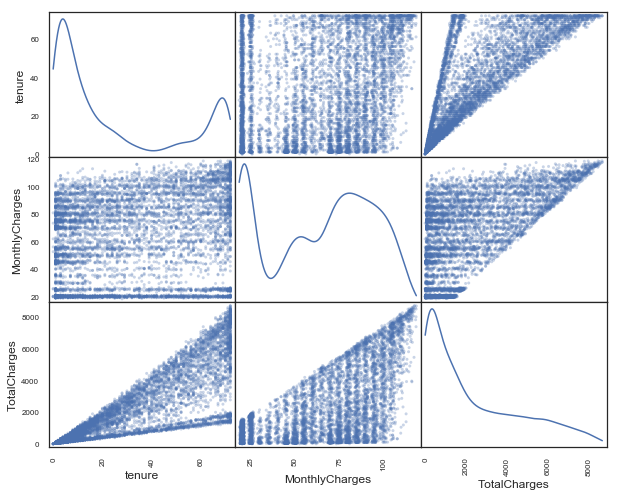

In [152]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
scatter_matrix(df[['tenure','MonthlyCharges','TotalCharges']], alpha=0.3, figsize = (10,8), diagonal = 'kde')

In [157]:
plt.figure(figsize=(12,8))

subjective_corr = df.corr()

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap='coolwarm', mask = mask)

ValueError: Mask must have the same shape as data.

<Figure size 864x576 with 0 Axes>

In [77]:
# EXPLICAÇÃO

In [ ]:
# GRAFICOS 

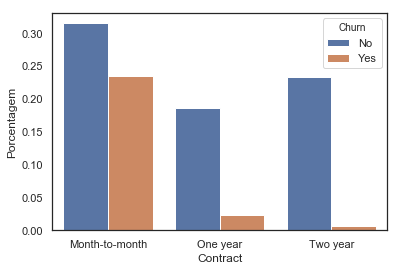

In [161]:
gp = df.groupby('Contract')["Churn"].value_counts()/len(df)
gp = gp.to_frame().rename({"Churn": "Porcentagem"}, axis=1).reset_index()
sns.barplot(x='Contract', y="Porcentagem", hue="Churn", data=gp)

In [ ]:
## CORRELAcao

In [160]:
df.dtypes.value_counts()

object     17
int64       2
float64     2
dtype: int64

In [364]:
# TODO: Utilize o one-hot encoding nos dados em 'features_log_minmax_transform' utilizando pandas.get_dummies()
features_final = pd.get_dummies(df)

In [366]:
encoded = list(features_final.columns)
print(encoded)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [367]:
features_final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,0,0,0,0,8,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6,1,0,0,1,22,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
7,0,0,0,0,10,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
8,0,0,1,0,28,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
9,1,0,0,1,62,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
df['SeniorCitizen'].value_counts()
sns.countplot(x="Contract", data=df)